# Inheritance (herencia)
Habiamos hablado de herencia en los topicos generaldes OOP (Object Oriented Programming). En la herencia hay dos actores:

1. Clase base, o padre, o la superclase (base, parent, superclass)
2. Clase derivada, o hija, o subclase (derived, child, subclass)

La superclase global se llama "object". El "object" es el Adan de las clases. Es decir, todas clases heredan de "object"

Las tres formas de formular una clase abajo son equivalentes.

In [2]:
class MyClass(object):
    pass

myClass = MyClass()
print(myClass)

In [3]:
class MyClass():
    pass

myClass = MyClass()
print(myClass)

In [4]:
class MyClass:
    pass

myClass = MyClass()
print(myClass)

In [6]:
objectMembers = dir(object)
print(objectMembers)

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [7]:
print(object)

<class 'object'>


In [10]:
a=2
type(a)

int

In [11]:
intMembers = dir(a)
print(intMembers)

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


In [12]:
len(intMembers)

70

In [13]:
len(objectMembers)

23

Para comparar los miembros de ```object``` con los miembros de ```int``` hacemos un "casting" a conjuntos. 

In [14]:
objSet  = set( objectMembers)
intSet = set(intMembers)
type(objSet)

set

In [15]:
# interseccion
interseccion = objSet.intersection(intSet)
print(interseccion)

{'__init__', '__eq__', '__getattribute__', '__le__', '__gt__', '__new__', '__reduce_ex__', '__ne__', '__hash__', '__class__', '__str__', '__subclasshook__', '__reduce__', '__sizeof__', '__doc__', '__lt__', '__dir__', '__setattr__', '__format__', '__init_subclass__', '__repr__', '__ge__', '__delattr__'}


In [16]:
print(len(interseccion))

23


In [17]:
interseccion == objSet

True

In [19]:
type(objectMembers)

list

De la misma forma como

$$ a(x+y+z) = ax + ay + az$$
vemos que la operacion de la izquierda tiene 2 sumas y una multiplicacion y la de la derecha 2 sumas y 3 multiplicaciones. Filosoficamente si pensamos en lo que esto significa a nivel de "factorizar" codigo , las ganancias pueden ser mucho mayores. La herencia captura este significado. Por ejemplo el atributo $a$ es comun a todos los miembros de la derecha. O sea que el atributo $a$ pasa la clase padre.

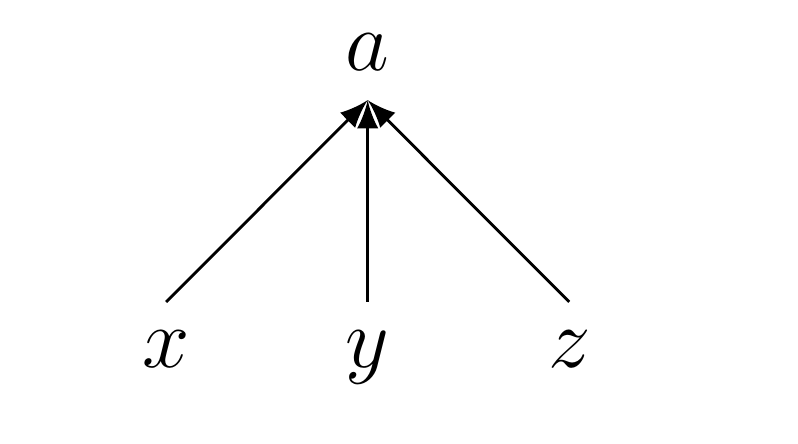

Es una forma simplicacad de un diagrama UML, donde se ve que como $a$ esta en la calse padre y $x,y,z$ son clases derivadas. 

## Herencia simple (simple inhertitance)
Tenemos un padre y posiblemende varios hijos.



In [22]:
class Person:
    def __init__(self, firstName, lastName, birthDay):
        self.firstName = firstName
        self.lastName = lastName
        self.birthDay = birthDay
        return

# creamos un objeto
myPerson = Person("Maria", "Lopez", "06/21/84")
myPerson.____dict




{'firstName': 'Maria', 'lastName': 'Lopez', 'birthDay': '06/21/84'}

In [23]:
vars(myPerson)

{'firstName': 'Maria', 'lastName': 'Lopez', 'birthDay': '06/21/84'}

La herencia mas simple que podamos tener entre dos clases es heredar todo sin necsitada de ```__init__()```.

In [24]:
# La clase padre (superclase, la clase base) entre parentesis
class Student(Person):  
    def pleaseSit(self):
        print("Please take a sit")
        return

    # ojo!!!  no __init__


In [25]:
p1 = Person("George", "Bleistein", "13/08/62")
s1 = Student("Maria", "Grisales", "20/10/2000")

print(vars(p1))
print(vars(s1))

{'firstName': 'George', 'lastName': 'Bleistein', 'birthDay': '13/08/62'}
{'firstName': 'Maria', 'lastName': 'Grisales', 'birthDay': '20/10/2000'}


Sin embargo, los metodos de los padres se pasan a los hijos, pero no al contrario. Si un hijo tiene un metodo es solo de el y sus descendientes

In [26]:
s1.pleaseSit()

Please take a sit


In [27]:
p1.pleaseSit()

AttributeError: ignored

Acerca del ```__init__()```. El init se pasa de padre a hijo. Pero el hijo podria tener mas atributos (de hecho casi siempre tiene mas).
Veamos un ejemplo de como  estos atributos entran en el nuevo ```__init__()``` de la clase hijo


In [28]:
class Student2(Person):

    def __init__(self, firstName, lastName, birthDay, grade):  # grade=anho escoloar
        super().__init__(firstName, lastName, birthDay)  # inherit from parent
        self.grade = grade
        return

In [29]:
myStudent = Student2("Romeo", "Agudelo", "05/21/70", 11)
vars(myStudent)

{'firstName': 'Romeo',
 'lastName': 'Agudelo',
 'birthDay': '05/21/70',
 'grade': 11}

El prefijo ```super``` no solo es para el metodo ```__init__()``` tambien se usa para otros metodos. Investigar esto.


## El uso de herencia para crear una interface informal (informal interface).
Recuerden que una interface es una clase donde solo se definen los metodos pero se implementan. La implementacion esta en otro lado. En este caso particular estara a cargo de clases hijas.



In [43]:
# informal interface
# asi como en C, C++, Java, se usan tipos
class Animal:
    def move(self, name:str, start:float, end:float, time:float) -> None: # void
        pass

    def oralSound(self, name:str, volume:float) -> None:
        pass

    def jump(self, name:str, height:float)->None:
        pass

class Perro(Animal):
    def __init__(self, nameMove, start, end, time, nameSound, volume):
        ''' clase Animal, ayuda '''
        self.nameMove = nameMove
        self.start = start # en metros
        self.end = end  # en metros
        self.time = time # en segundos
        self.nameSound = nameSound
        self.volume = volume # en db
        return

    def move(self):
        distance = self.end - self.start
        averageSpeed = distance/self.time
        print("A dog %s at a speed of %f m/s\n"%(self.nameMove, averageSpeed))
        return

    def oralSound(self):
        name=self.nameSound
        print("A dog %s at a volume of %f db\n"%(name, self.volume))

    def jump(self):
        raise NotImplementedError

In [44]:
help(Perro)

Help on class Perro in module __main__:

class Perro(Animal)
 |  Perro(nameMove, start, end, time, nameSound, volume)
 |  
 |  Method resolution order:
 |      Perro
 |      Animal
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nameMove, start, end, time, nameSound, volume)
 |      clase Animal, ayuda
 |  
 |  jump(self)
 |  
 |  move(self)
 |  
 |  oralSound(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Animal:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [45]:
myAnimal = Animal()
print(dir(myAnimal))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'jump', 'move', 'oralSound']


In [46]:
myPerro = Perro("runs", 10, 20, 2, "bark", 50)
myPerro.__dict__

{'nameMove': 'runs',
 'start': 10,
 'end': 20,
 'time': 2,
 'nameSound': 'bark',
 'volume': 50}

In [47]:
myPerro.move()

A dog runs at a speed of 5.000000 m/s



In [48]:
myPerro.oralSound()

A dog bark at a volume of 50.000000 db



In [49]:
myPerro.jump()  # DEBE SACAR UN ERROR

NotImplementedError: ignored

Otra forma de definir interfaces informales mediante el uso de ```Protocol```

In [53]:
pip install typing_extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
# importamos Protocol
# from typing import Protocol
from typing_extensions import Protocol

class Animal(Protocol):
    def move(self, name:str, start:float, end:float, time:float) -> None:
        pass

    def oralSound(self, name:str, volume:float) -> None:
        pass

    def jump(self, name:str, height: float)-> None:
        pass


class Perro(Animal):
    def __init__(self, nameMove:str, start:float, end:float, time:float, nameSound:str, volume:float)->None:
        self.nameMove = nameMove
        self.start = start  # en metros
        self.end = end  # en metros
        self.time = time # en segundos
        self.nameSound = nameSound 
        self.volume = volume # en db
        return

    def move(self):
        distance = self.end - self.start
        averageSpeed = distance/self.time
        print("A dog %s at a speed of %f m/s \n"%(self.nameMove, averageSpeed))
        return

    def oralSound(self):
        name=self.nameSound
        print("A dog %s at a volume of %f db\n"%(name, self.volume))

    def jump(self):
        raise NotImplementedError


In [60]:
myAnimal = Animal()  # los protocolos no se pueden instaciar

TypeError: ignored

In [61]:
myPerro = Perro("runs", 10, 20, 2, "bark", 50)
myPerro.__dict__

{'nameMove': 'runs',
 'start': 10,
 'end': 20,
 'time': 2,
 'nameSound': 'bark',
 'volume': 50}

In [62]:
myPerro.move()

A dog runs at a speed of 5.000000 m/s 



In [63]:
myPerro.oralSound()

A dog bark at a volume of 50.000000 db



In [64]:
myPerro.jump()

NotImplementedError: ignored

Ejemplo de herencia simple en paralelo.

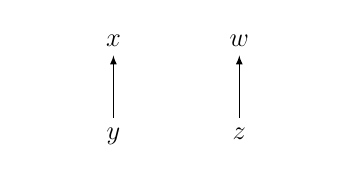

In [69]:
from statistics import mean, median, mode
class Group:
    weights=[0.3, 0.4, 0.4]  # una variable de clase

    def __init__(self, students):
        self.students = students
        return


class Students(Group):
    def __init__(self, hw, partial, final, name, identification):
        self.hw = hw
        self.partial = partial
        self.final = final
        self.name=name
        self.id = identification
        return

    def finalGrade(self):
        return self.hw*self.weights[0] + self.partial*self.weights[1] + self.final*self.weights[2]


class Grades:
    def  __init__(self, myList):
        self.myList = myList
        return
    
    def minim(self):
        return min(self.myList)

    def maxim(self):
        return max(self.myList)

class Statistics(Grades):
    def meanValue(self):
        return mean(self.myList)

    def medianValue(self):
        return median(self.myList)

    def modeValue(self):
        return mode(self.myList)

# instanciamos un par de estudiantes
juan = Students(3, 3.4, 2.8, "Juan", "23453")
pedro = Students(2.1, 2.2, 4.5, "Pedro", "35244")
print(juan.__dict__)
print(pedro.__dict__)

    

{'hw': 3, 'partial': 3.4, 'final': 2.8, 'name': 'Juan', 'id': '23453'}
{'hw': 2.1, 'partial': 2.2, 'final': 4.5, 'name': 'Pedro', 'id': '35244'}


In [70]:
juan.finalGrade()

3.38

In [71]:
pedro.finalGrade()

3.3100000000000005

In [72]:
myStudents = [juan, pedro]

myClass = []
for student in myStudents:
    myClass.append(Group(student))

myClass[0].students.__dict__



{'hw': 3, 'partial': 3.4, 'final': 2.8, 'name': 'Juan', 'id': '23453'}

In [73]:
# creamos un diccionario cocn las notas finales
myGrades=[]
for i in range(len(myClass)):
    myGrades.append(myClass[i].students.finalGrade())

myGrades

[3.38, 3.3100000000000005]

In [74]:
cal = Grades(myGrades)
print("minima califiacion", cal.minim())
print("maxima calificacion",cal.maxim())

minima califiacion 3.3100000000000005
maxima calificacion 3.38


In [75]:
# la clase padre no tiene acceso a los metodos de la clase hija
cal.meanValue()

AttributeError: ignored

In [78]:
calStat = Statistics(myGrades)
print("nota minima", calStat.minim())
print("nota maxima", calStat.maxim())

meanv = calStat.meanValue()
medianv = calStat.medianValue()
# modev = calStat.modeValue()

print("mean value",meanv)
print("median value", medianv)
# print("mode value", modev)

nota minima 3.3100000000000005
nota maxima 3.38
mean value 3.345
median value 3.345


In [80]:
mode([1,2])

StatisticsError: ignored

In [81]:
mode([1,1,2])

1

## Herencia multinivel (multi-level inheritance)

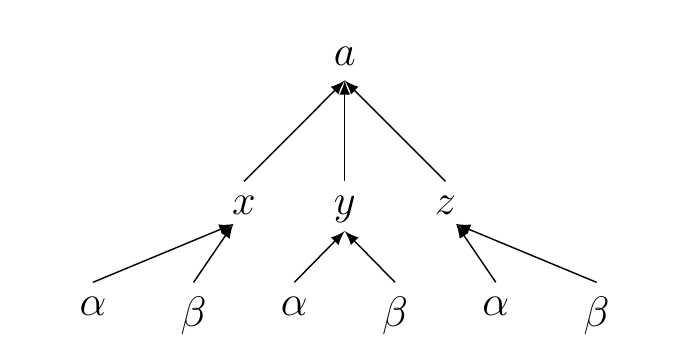

$$a [ x(\alpha + \beta)     + y(\alpha + \beta)     + z(\alpha + \beta) ] = a x \alpha + a x \beta + a y \alpha + a y \beta + a z \alpha + a z \beta $$